In [64]:
import pandas as pd

file = 'S02-hw-dataset.csv'  # путь к датасету
df = pd.read_csv(file, sep=',')  # загрузка датаеста
df.head()  # первые 5 строк датасета

,user_id,age,country,purchases,revenue
0,1,25.0,FR,7,749
1,2,24.0,RU,5,1115
2,3,52.0,FR,7,399
3,4,31.0,RU,6,654
4,5,NaN,DE,6,1296


In [65]:
df.info()  # информация о столбцах и типах

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        39 non-null     float64
 2   country    41 non-null     object 
 3   purchases  41 non-null     int64  
 4   revenue    41 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB


In [66]:
df.describe()  # статистика

,user_id,age,purchases,revenue
count,41.000000,39.000000,41.000000,41.000000
mean,20.243902,36.512821,4.829268,820.048780
std,11.659289,18.304259,2.710189,613.127269
min,1.000000,5.000000,-1.000000,0.000000
25%,10.000000,24.000000,3.000000,432.000000
50%,20.000000,33.000000,5.000000,693.000000
75%,30.000000,45.500000,7.000000,1115.000000
max,40.000000,120.000000,11.000000,2475.000000


In [67]:
df.isna().mean()  # доля пропусков

user_id      0.00000
age          0.04878
country      0.00000
purchases    0.00000
revenue      0.00000
dtype: float64

In [68]:
df.duplicated()  # наличие дублирующих строк

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40     True
dtype: bool

In [69]:
# подозрительные случаи
print(f'Отрицательный возраст:\n{df[df['age'] < 0]}')
print(f'\nСлишком большой возраст:\n{df[df['age'] > 100]}')
print(f'\nОтрицательные покупки:\n{df[df['purchases'] < 0]}')
print(f'\nОтрицательный доход:\n{df[df['revenue'] < 0]}')
print(f'\nНулевой доход при ненулевых покупках:\n{df[(df['revenue'] == 0) & (df['purchases'] > 0)]}')

Отрицательный возраст:
Empty DataFrame
Columns: [user_id, age, country, purchases, revenue]
Index: []

Слишком большой возраст:
   user_id    age country  purchases  revenue
5        6  120.0      FR         -1      785

Отрицательные покупки:
   user_id    age country  purchases  revenue
5        6  120.0      FR         -1      785

Отрицательный доход:
Empty DataFrame
Columns: [user_id, age, country, purchases, revenue]
Index: []

Нулевой доход при ненулевых покупках:
    user_id   age country  purchases  revenue
10       11  24.0      US          4        0


In [70]:
print(f'Частота для столбца country: {df['country'].value_counts()}')
print(print(f'\nЧастота для столбца country: {df['purchases'].value_counts()}'))  # частота в данных

Частота для столбца country: country
RU    13
FR    12
US     8
DE     6
CN     2
Name: count, dtype: int64

Частота для столбца country: purchases
 7     8
 6     8
 3     5
 5     4
 4     4
 2     3
 0     3
 9     2
-1     1
 8     1
 11    1
 1     1
Name: count, dtype: int64
None


In [71]:
print(df.groupby('country').agg(
    count=('user_id', 'count'),
    mean_age=('age', 'mean'),
    mean_revenue=('revenue', 'mean'),
    sum_revenue=('revenue', 'sum'),
    mean_purchases=('purchases', 'mean'),
    sum_purchases=('purchases', 'sum')
))  # группировка по странам, подсчет среднего дохода и суммарного дохода в каждой стране

         count   mean_age  mean_revenue  sum_revenue  mean_purchases  \
country                                                                
CN           2  24.000000   1054.000000         2108        4.500000   
DE           6  34.600000   1445.500000         8673        6.500000   
FR          12  46.250000    675.916667         8111        4.250000   
RU          13  30.076923    790.076923        10271        4.769231   
US           8  36.714286    557.375000         4459        4.625000   

         sum_purchases  
country                 
CN                   9  
DE                  39  
FR                  51  
RU                  62  
US                  37  


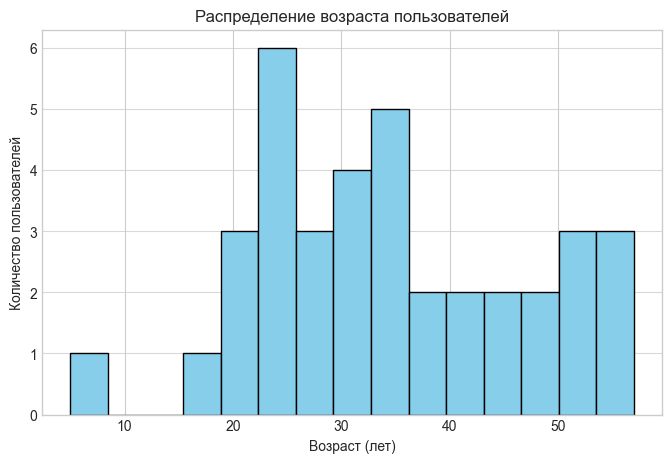

In [72]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))  # размер графика
df_clean = df[~df.duplicated(keep='first')].copy()
df_clean = df_clean[(df_clean['age'] <= 100) & (df_clean['purchases'] >= 0)]  # очистка данных от дубликатов и подозрительных данных

plt.hist(df_clean['age'].dropna(), bins=15, color='skyblue', edgecolor='black')  # кооличество корзин (столбцов) - 15
plt.title('Распределение возраста пользователей')  # подпдись гистограммы
plt.xlabel('Возраст (лет)')  # подпдись оси x на гистограмме
plt.ylabel('Количество пользователей')  # подпдись оси y на гистограмме
plt.grid(axis='y', alpha=0.75)  # горизонтальные линии для комфортного чтения гистограммы

figures_dir = './figures/'
save_path = os.path.join(figures_dir, 'histogram_age.png')
plt.savefig(save_path)  # сохранение гистограммы

plt.show()
plt.close()

<Figure size 1000x600 with 0 Axes>

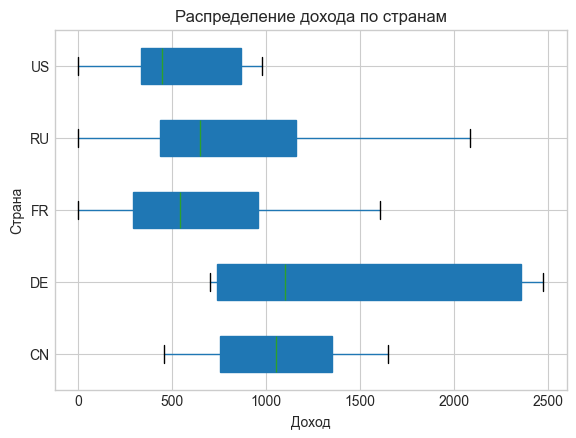

In [73]:
plt.figure(figsize=(10, 6))  # размер графика
df_clean.dropna(subset=['country', 'revenue'], inplace=True)  # очистка данных от пропусков

df_clean.boxplot(column='revenue', by='country', grid=True, patch_artist=True, vert=False)  # построение боксплота
plt.title('Распределение дохода по странам')  # подпись баксплота
plt.suptitle('')  # подпись баксплота
plt.xlabel('Доход')  # подпись оси x
plt.ylabel('Страна')  # подпись оси y

figures_dir = './figures/'
save_path = os.path.join(figures_dir, 'boxplot_revenue_country.png')
plt.savefig(save_path)  # сохранение гистограммы

plt.show()
plt.close()

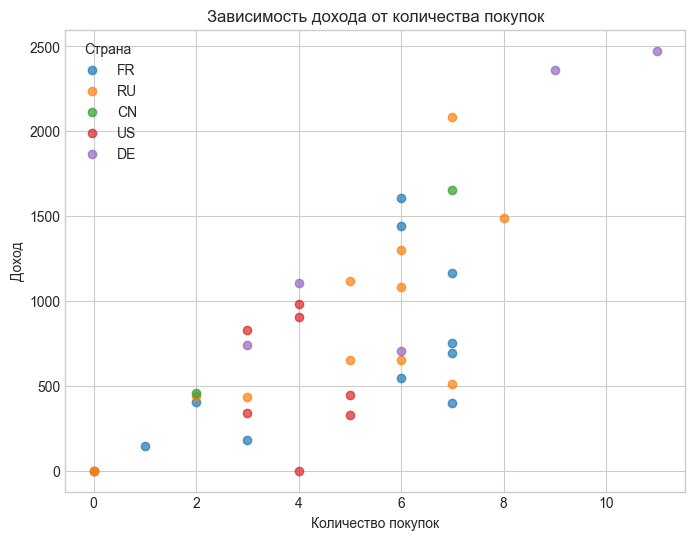

In [74]:
plt.figure(figsize=(8, 6))  # размер графика

# выделение разных стран разным цветом
countries = df_clean['country'].unique()  # выделение разных стран разным цветом
for country in countries:
    subset = df_clean[df_clean['country'] == country]
    plt.scatter(subset['purchases'], subset['revenue'], label=country, alpha=0.7)  # построение диаграммы

plt.title('Зависимость дохода от количества покупок')  # подпись диаграммы
plt.xlabel('Количество покупок')  # подпись оси x
plt.ylabel('Доход')  # подпись оси y
plt.legend(title='Страна')  # добавление легенды
plt.grid(True)  # сетка

figures_dir = './figures/'
save_path = os.path.join(figures_dir, 'scatter_purchases_revenue.png')
plt.savefig(save_path)  # сохранение гистограммы

plt.show()
plt.close()